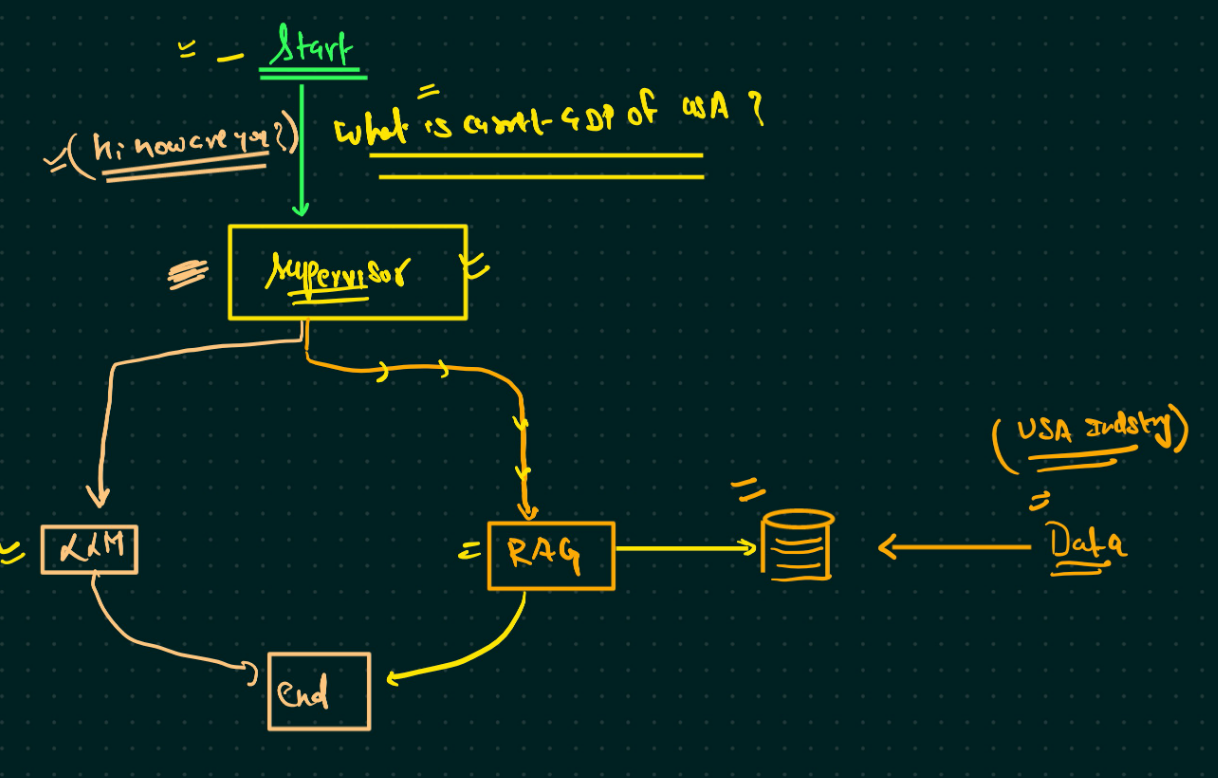

In [1]:
from langchain_google_genai import ChatGoogleGenerativeAI
model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')

c:\learning\gen_ai\Agentic2O\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model.invoke("hi").content

'Hi there! How can I help you today?'

#### import embedding

In [3]:
from dotenv import load_dotenv

In [4]:
load_dotenv()

True

In [5]:
import os
os.environ['HF_TOKEN']=os.getenv("HF_TOKEN")

In [6]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings=HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

In [7]:
embeddings.embed_query("hello AI")

[-0.033388182520866394,
 0.03453972190618515,
 0.059474531561136246,
 0.05928609147667885,
 -0.0635354220867157,
 -0.06819586455821991,
 0.08823323994874954,
 0.03444080427289009,
 -0.03278516232967377,
 -0.015814989805221558,
 0.02098178118467331,
 -0.01834029331803322,
 -0.03983215242624283,
 -0.0804707482457161,
 -0.014469144865870476,
 0.0332648828625679,
 0.014259284362196922,
 -0.03404996916651726,
 -0.142915740609169,
 -0.023083344101905823,
 -0.021380102261900902,
 0.002633501309901476,
 -0.047292742878198624,
 -0.010752756148576736,
 -0.06866798549890518,
 0.031125057488679886,
 0.0759458914399147,
 0.0011283254716545343,
 0.011631987057626247,
 -0.03603919595479965,
 0.04483763128519058,
 0.018390750512480736,
 0.12672801315784454,
 -0.0013597895158454776,
 0.008206663653254509,
 0.06909968703985214,
 -0.08076353371143341,
 -0.05841314047574997,
 0.053754497319459915,
 0.026227595284581184,
 -0.006828607991337776,
 -0.056358352303504944,
 0.0032930178567767143,
 -0.0725017860

In [8]:
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [9]:
loader = DirectoryLoader("data2",glob="./*.txt", loader_cls=TextLoader
                        )

In [10]:

docs=loader.load()

docs

In [11]:
docs

[Document(metadata={'source': 'data2\\usa.txt'}, page_content="ðŸ‡ºðŸ‡¸ Overview of the U.S. Economy\nThe United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services. It has a highly diversified structure with strong sectors in technology, healthcare, finance, real estate, defense, and agriculture.\n\nU.S. GDP â€“ Size, Composition, and Global Share\nAs of 2024, the United Statesâ€™ nominal GDP is estimated to be around $28 trillion USD, accounting for approximately 25% of the global economy. It ranks #1 in the world by nominal GDP, far ahead of China (wh

In [12]:
docs[0].page_content

"ðŸ‡ºðŸ‡¸ Overview of the U.S. Economy\nThe United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services. It has a highly diversified structure with strong sectors in technology, healthcare, finance, real estate, defense, and agriculture.\n\nU.S. GDP â€“ Size, Composition, and Global Share\nAs of 2024, the United Statesâ€™ nominal GDP is estimated to be around $28 trillion USD, accounting for approximately 25% of the global economy. It ranks #1 in the world by nominal GDP, far ahead of China (which ranks 2nd). The U.S. GDP per capita is also among the high

In [13]:
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=200,
    chunk_overlap=50
)

In [14]:

new_docs=text_splitter.split_documents(documents=docs)

In [15]:
new_docs

[Document(metadata={'source': 'data2\\usa.txt'}, page_content='ðŸ‡ºðŸ‡¸ Overview of the U.S. Economy'),
 Document(metadata={'source': 'data2\\usa.txt'}, page_content='The United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy,'),
 Document(metadata={'source': 'data2\\usa.txt'}, page_content='It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a'),
 Document(metadata={'source': 'data2\\usa.txt'}, page_content='a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services.'),
 Document(metadata={'source': 'data2\\usa.txt'}, page_content='innovation, global trade, and financial

In [16]:
doc_string=[doc.page_content for doc in new_docs]

In [17]:
doc_string

['ðŸ‡ºðŸ‡¸ Overview of the U.S. Economy',
 'The United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy,',
 'It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a',
 'a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services.',
 'innovation, global trade, and financial services. It has a highly diversified structure with strong sectors in technology, healthcare, finance, real estate, defense, and agriculture.',
 'U.S. GDP â€“ Size, Composition, and Global Share',
 'As of 2024, the United Statesâ€™ nominal GDP is estimated to be around $28 trillion USD, accounting for appr

In [18]:
db=Chroma.from_documents(new_docs,embeddings)

In [19]:
retriever=db.as_retriever(search_kwargs={"k": 3})

In [20]:

retriever.invoke("industrial growth of usa?")

[Document(metadata={'source': 'data2\\usa.txt'}, page_content='The U.S. economy remains the engine of global growth, backed by unmatched innovation, financial dominance, and a strong institutional framework. Its $28 trillion GDP and influence over global'),
 Document(metadata={'source': 'data2\\usa.txt'}, page_content='GDP Growth Trends and Dynamics'),
 Document(metadata={'source': 'data2\\usa.txt'}, page_content='The U.S. maintains its GDP growth through strong innovation, entrepreneurship, and investment in R&D. With companies like Apple, Google, Amazon, Microsoft, and Tesla leading global markets, the U.S.')]

Create a pydantic class

In [63]:
import operator
from typing import List
from pydantic import BaseModel , Field
from langchain.prompts import PromptTemplate
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,END

In [22]:
class TopicSelectionParser(BaseModel):
    Topic:str=Field(description="selected topic")
    Reasoning:str=Field(description='Reasoning behind topic selection')

In [23]:
from langchain.output_parsers import PydanticOutputParser

In [25]:
parser=PydanticOutputParser(pydantic_object=TopicSelectionParser)

In [26]:

parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}\n```'

In [28]:
print('The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}\n```')

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}
```


AgentState is a dictionary
- Key : messages
- value : 
    - Annotated : indicated the text data
    - Sequence : indicates list of text data
    - operator.add : indicates message is to be appended

In [89]:

class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [90]:

Agentstate={}

In [91]:

Agentstate["messages"]=[]

In [92]:

Agentstate

{'messages': []}

In [93]:

Agentstate["messages"].append("hi how are you?")

In [94]:

Agentstate

{'messages': ['hi how are you?']}

In [95]:
Agentstate["messages"].append("what are you doing?")

In [96]:
Agentstate

{'messages': ['hi how are you?', 'what are you doing?']}

In [98]:
Agentstate["messages"].append("i hope everything fine")

In [99]:

Agentstate

{'messages': ['hi how are you?',
  'what are you doing?',
  'i hope everything fine',
  'i hope everything fine']}

In [100]:
# last message
Agentstate["messages"][-1]

'i hope everything fine'

In [101]:
# first message
Agentstate["messages"][0]

'hi how are you?'

AgentState is used to flow the output to diffrent nodes.

In [102]:

def function_1(state:AgentState):
    question=state["messages"][-1]
    
    print("Question",question)
    
    template="""
    Your task is to classify the given user query into one of the following categories: [USA,Not Related]. 
    Only respond with the category name and nothing else.

    User query: {question}
    {format_instructions}
    """
    
    prompt= PromptTemplate(
        template=template,
        input_variable=["question"],
        partial_variables={"format_instructions": parser.get_format_instructions()}
    )
    
    
    chain= prompt | model | parser
    
    response = chain.invoke({"question":question})
    
    print("Parsed response:", response)
    
    return {"messages": [response.Topic]}

In [103]:
state={"messages":["what is a today weather?"]}

In [104]:
function_1(state)

Question what is a today weather?
Parsed response: Topic='Not Related' Reasoning="The query is a general weather question and doesn't relate to the USA specifically."


{'messages': ['Not Related']}

In [105]:
state={"messages":["what is a GDP of usa??"]}

In [106]:
function_1(state)

Question what is a GDP of usa??
Parsed response: Topic='USA' Reasoning='The query explicitly asks for the GDP of the USA.'


{'messages': ['USA']}

In [107]:
def router(state:AgentState):
    print("-> ROUTER ->")
    
    last_message=state["messages"][-1]
    print("last_message:", last_message)
    
    if "usa" in last_message.lower():
        return "RAG Call"
    else:
        return "LLM Call"

In [108]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

In [109]:
# RAG function
def function_2(state:AgentState):
    print("-> RAG Call ->")
    
    question = state["messages"][0]
    
    prompt=PromptTemplate(
        template="""You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:""",
        
        input_variables=['context', 'question']
    )
    
    rag_chain = (
        {"context": retriever | format_docs, "question": RunnablePassthrough()}
        | prompt
        | model
        | StrOutputParser()
    )
    result = rag_chain.invoke(question)
    return  {"messages": [result]}

In [110]:
# LLM function
def function_3(state:AgentState):
    print("-> LLM Call ->")
    question = state["messages"][0]
    
    # Normal LLM call
    complete_query = "Anwer the follow question with you knowledge of the real world. Following is the user question: " + question
    response = model.invoke(complete_query)
    return {"messages": [response.content]}

In [111]:
from langgraph.graph import StateGraph,END

Here we are not using simple GRAPH instead we are using STATEGRAPH as we want to maintain the state 

In [112]:
workflow=StateGraph(AgentState)

In [113]:
workflow.add_node("Supervisor",function_1)

In [114]:

workflow.add_node("RAG",function_2)

In [115]:

workflow.add_node("LLM",function_3)

In [116]:

workflow.set_entry_point("Supervisor")

In [117]:
workflow.add_conditional_edges(
    "Supervisor",
    router,
    {
        "RAG Call": "RAG",
        "LLM Call": "LLM",
    }
)

In [118]:

workflow.add_edge("RAG",END)
workflow.add_edge("LLM",END)

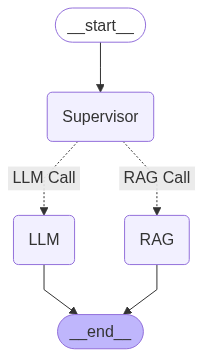

In [119]:
workflow.compile()

In [120]:
app=workflow.compile()

In [121]:
state={"messages":['hi']}

In [122]:
app.invoke(state)

Question hi
Parsed response: Topic='Not Related' Reasoning="The query 'hi' is a greeting and does not contain any information related to the USA."
-> ROUTER ->
last_message: Not Related
-> LLM Call ->


{'messages': ['hi', 'Not Related', 'Hi there!  How can I help you today?']}

In [123]:
app.invoke({"messages":['What is GDP of USA?']})

Question What is GDP of USA?
Parsed response: Topic='USA' Reasoning='The query explicitly asks for the GDP of the USA.'
-> ROUTER ->
last_message: USA
-> RAG Call ->


{'messages': ['What is GDP of USA?',
  'USA',
  "The nominal GDP of the USA in 2024 is estimated to be around $28 trillion USD.  This makes it the world's largest economy by nominal GDP.  It accounts for roughly 25% of the global economy."]}

In [124]:
app.invoke({"messages":["Can you tell me the industrial growth of world's most powerful economies?"]})

Question Can you tell me the industrial growth of world's most powerful economies?
Parsed response: Topic='Not Related' Reasoning="The query asks about the industrial growth of the world's most powerful economies, which is a global topic and not specifically related to the USA."
-> ROUTER ->
last_message: Not Related
-> LLM Call ->


{'messages': ["Can you tell me the industrial growth of world's most powerful economies?",
  'Not Related',
  'Defining "industrial growth" and "most powerful economies" requires some clarification, as both are multifaceted.  We could look at manufacturing output, industrial value added as a percentage of GDP, or even broader measures encompassing technology and innovation.  Similarly, "most powerful" could refer to GDP, military strength, or global influence.\n\nFocusing on **GDP and manufacturing output as indicators of industrial strength for the world\'s largest economies**, the picture is complex and doesn\'t show uniform growth:\n\n* **United States:** The US remains a major industrial power, though its manufacturing sector\'s share of GDP has declined relative to its service sector.  Growth in recent years has been mixed, influenced by factors like reshoring (bringing manufacturing back to the US), technological advancements (automation), and global supply chain disruptions.  Gr

Assignment:4
1. you have to create one supervisor node.
2. create one router function
3. create three more node
3.1 llm call (llm node)
3.2 RAG (rag node)
3.3 web crawler(fetch the info in realtime from internet)
4. created one more node after this for validation for generated output --> explore the validation part how to do that
5. if validation going to be failed in that case again go to supervioser node and then supervisor node will again decide what needs to be call next
6. once the validation will pass then only generate the final output

submission deadline till 9pm friday

submission instruction:
create your github repo and keep all the assisgnments over there(in that github repo)
i will share one googleform in group after completing your assignment you can share the github link through that google form. 